# Ôn tập giữa kỳ


In [8]:
# import library...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## ĐỀ BÀI

Hệ thống giám sát rủi ro dựa trên hành vi (The Behavior Risk Factor Surveilance System - BRFSS) là một cuộc khảo sát qua điện thoại hàng năm với 350.000 người ở Hoa Kỳ. Như tên gọi của nó, BRFSS được thiết kế để xác định các yếu tố nguy cơ ở người trưởng thành và báo cáo các xu hướng sức khỏe mớ. Ví dụ, người trả lời được hỏi về chế độ ăn uống và hoạt động thể chất hàng tuần, tình trạng HIV/AIDS, khả năng sử dụng thuốc lá và thậm chí cả mức độ chi trả dịch vụ chăm sóc sức khỏe của họ. 

Bộ dữ liệu **brfss_2000** chứa thông tin khảo sát năm 2000, với hơn 200 thông tin. Trong bộ dữ liệu này, ta chỉ khảo sát một số thông tin sau:
-	genhlth: người khảo sát tự đánh giá sức khỏe (excellent, very good, good, fair or poor)
-	exerany: cho biết có hoạt động thể chất nào trong tháng gần nhất hay không, có (1), không (0)
-	hlthplan: có bảo hiểm (1) hay không (0)
-	smoke100: tổng số điếu thuốc đã hút ít nhất
-	height: chiều cao (inches)
-	weight: cân nặng (pounds)
-	wtdesire:  cân nặng mong muốn(pounds)
-	age: tuổi
-	gender: giới tính: nam(m), nữ(f)


### Câu 1:

Đọc hai bộ dữ liệu trên và cho biết mỗi bộ dữ liệu có kích thước bao nhiêu dòng, bao nhiêu cột?

In [10]:

data = pd.read_csv('data/brfss_2000.csv')
data.shape
# 20000 dòng, 9 cột

(20000, 9)

In [7]:
data.head(5)

,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender,genhlth
0,0,1,0,70,175,175,77,m,good
1,0,1,1,64,125,115,33,f,good
2,1,1,1,60,105,105,49,f,good
3,1,1,0,66,132,124,42,f,good
4,0,1,0,61,150,130,55,f,very good


### Câu 2

a, Tính tỷ lệ nam nữ

b, Trong số những người tập thể thao, tỷ lệ những người tự đánh giá có sức khỏe kém là bao nhiêu?

In [33]:
gender_counts = data["gender"].value_counts(normalize=True) * 100 
print(gender_counts)
# normolize=True: tinh ti le 

gender
f    52.155
m    47.845
Name: proportion, dtype: float64


In [53]:
#Trong số những người tập thể thao, tỷ lệ những người tự đánh giá có sức khỏe kém là bao nhiêu?
do_execise_data = data[data["exerany"] == 1]
poor_health_ratio = do_execise_data["genhlth"].isin(["poor", "fair"]).mean() * 100
print(poor_health_ratio)

9.755934021724553


### Câu 3

a, Đổi đơn vị chiều cao từ inches sang centimet, đơn vị cân nặng từ pound sang kg.

b, Tính tỷ lệ những người muốn giảm cân.

In [7]:
#Nhân height với 2.54 để chuyển inches → cm.
#Nhân weight với 0.453592 để chuyển pound → kg.
weight_loss_ratio = (data["weight"] > data["wtdesire"]).mean() * 100
print(weight_loss_ratio)

63.82


### Câu 4:

a, Theo bạn trong các thuộc tính trên, thuộc tính nào có phân phối chuẩn. Vẽ hình minh họa

b, Vẽ đồ thị boxplot so sánh cân nặng của những người có tập thể dục

<Axes: xlabel='age', ylabel='Count'>

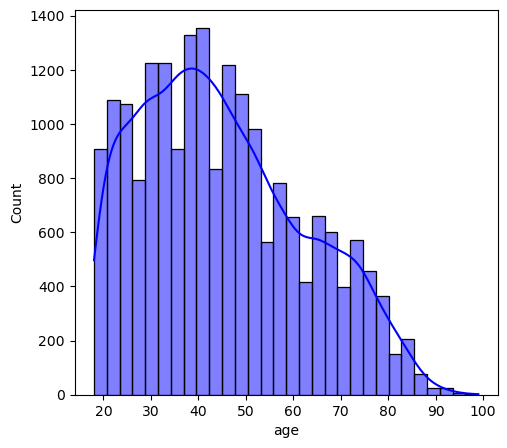

In [19]:
#Phân phối chuẩn thường gặp ở các biến liên tục như chiều cao, cân nặng, cân nặng mong muốn, tuổi.
values = data["age"].dropna()  # Loại bỏ giá trị NaN nếu có

# Vẽ Histogram + KDE
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(values, bins=30, kde=True, color='blue')

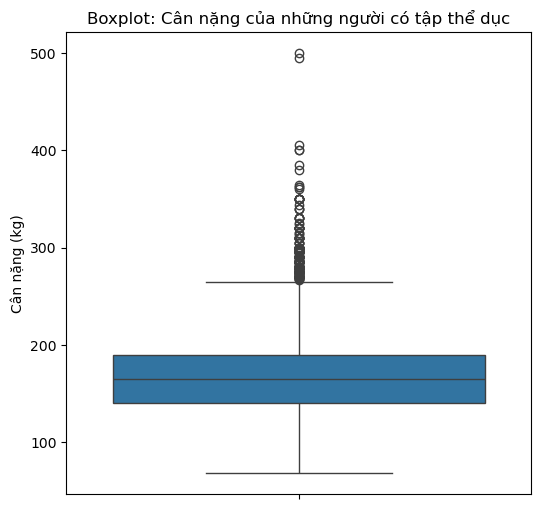

In [23]:
# ve boxplot 
# Lọc dữ liệu chỉ lấy những người có tập thể dục (exerany = 1)
data_exercise = data[data["exerany"] == 1]

# Vẽ boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(y=data_exercise["weight"])
plt.ylabel("Cân nặng (kg)")
plt.title("Boxplot: Cân nặng của những người có tập thể dục")
plt.show()


### Câu 5

Phân bố tuổi tác trong mẫu: Hãy mô tả phân bố tuổi của người tham gia khảo sát. Tuổi trung bình, độ lệch chuẩn, và các phân vị 25%, 50%, 75% là bao nhiêu?



In [25]:
#mean_age = data["age"].mean()  # Trung bình
#std_age = data["age"].std()  # Độ lệch chuẩn
#q1 = data["age"].quantile(0.25)  # Phân vị 25%
#median_age = data["age"].median()  # Trung vị (Phân vị 50%)
#q3 = data["age"].quantile(0.75)  # Phân vị 75%

# Mô tả thống kê tuổi
age_stats = data["age"].describe(percentiles=[0.25, 0.5, 0.75])

# Xuất kết quả
print(f"Tuổi trung bình: {age_stats['mean']:.2f}")
print(f"Độ lệch chuẩn: {age_stats['std']:.2f}")
print(f"Phân vị 25%: {age_stats['25%']}")
print(f"Phân vị 50% (Median): {age_stats['50%']}")
print(f"Phân vị 75%: {age_stats['75%']}")

Tuổi trung bình: 45.07
Độ lệch chuẩn: 17.19
Phân vị 25%: 31.0
Phân vị 50% (Median): 43.0
Phân vị 75%: 57.0


### Câu 6

Tỉ lệ người hút thuốc: Tính tỉ lệ phần trăm người tham gia khảo sát hiện đang hút thuốc lá. Liệu có sự khác biệt đáng kể về tỉ lệ này giữa các nhóm tuổi khác nhau không?



In [20]:
# Xác định người hiện đang hút thuốc (smoke100 > 0)
num_smokers = (data["smoke100"] > 0).sum()
total_people = data.shape[0]

# Tính tỉ lệ phần trăm
smoking_rate = (num_smokers / total_people) * 100
print(f"Tỉ lệ người hút thuốc: {smoking_rate:.2f}%")

Tỉ lệ người hút thuốc: 47.21%


In [28]:
# Phân nhóm tuổi
bins = [0, 24, 44, 64, 100]  # Các khoảng tuổi
labels = ["Dưới 25", "25-44", "45-64", "65+"]

# Thêm cột nhóm tuổi
data["age_group"] = pd.cut(data["age"], bins=bins, labels=labels)

# Tính tỉ lệ hút thuốc theo nhóm tuổi
smoking_by_age = data.groupby("age_group", observed=False)["smoke100"].apply(lambda x: (x > 0).mean() * 100)

# Hiển thị kết quả
print(smoking_by_age)

age_group
Dưới 25    39.314431
25-44      42.857143
45-64      53.480533
65+        52.551020
Name: smoke100, dtype: float64


### Câu 7

BMI trung bình theo giới tính: Tính chỉ số BMI trung bình cho nam và nữ trong mẫu. 



In [30]:
# Chuyển đổi đơn vị
data["weight_kg"] = data["weight"] * 0.453592
data["height_m"] = data["height"] * 0.0254

# Tính BMI
data["BMI"] = data["weight_kg"] / (data["height_m"] ** 2)

# Tính BMI trung bình theo giới tính
bmi_by_gender = data.groupby("gender")["BMI"].mean()

# Hiển thị kết quả
print(bmi_by_gender)


gender
f    25.743674
m    26.926313
Name: BMI, dtype: float64


### câu 8

Phân tích tỉ lệ bệnh béo phì: Sử dụng các tiêu chuẩn của CDC về chỉ số BMI để phân loại người tham gia vào nhóm béo phì. Tính tỉ lệ béo phì theo giới tính và độ tuổi. 

In [34]:
# Chuyển đổi đơn vị
data["weight_kg"] = data["weight"] * 0.453592
data["height_m"] = data["height"] * 0.0254

# Tính chỉ số BMI
data["BMI"] = data["weight_kg"] / (data["height_m"] ** 2)

# Xác định nhóm béo phì
data["obese"] = data["BMI"] >= 30

# Nhóm tuổi
bins = [0, 24, 44, 64, 100]  # Các khoảng tuổi
labels = ["Dưới 25", "25-44", "45-64", "65+"]
data["age_group"] = pd.cut(data["age"], bins=bins, labels=labels)

# Tính tỉ lệ béo phì theo giới tính
obesity_by_gender = data.groupby("gender")["obese"].mean() * 100

# Tính tỉ lệ béo phì theo nhóm tuổi
obesity_by_age = data.groupby("age_group", observed=False)["obese"].mean() * 100

# Hiển thị kết quả
print("Tỉ lệ béo phì theo giới tính:")
print(obesity_by_gender)
print("\nTỉ lệ béo phì theo nhóm tuổi:")
print(obesity_by_age)


Tỉ lệ béo phì theo giới tính:
gender
f    18.512127
m    20.117045
Name: obese, dtype: float64

Tỉ lệ béo phì theo nhóm tuổi:
age_group
Dưới 25    11.045281
25-44      19.445772
45-64      23.428282
65+        17.316927
Name: obese, dtype: float64


---